In [1]:
import astropy.io.fits
import numpy as np

In [2]:
fits = astropy.io.fits.open("HSC_grizy_example.fits")
table = fits[1].data

In [15]:
def getMagnitudes(table, magzero, fluxes):

    """
    returns the magnitudes of the fluxes through each filter of HSC
    """
    result = {}

    mask = np.ones(len(table), dtype=bool)

    for k,v in fluxes.items():
        mask = np.logical_and(mask, np.isfinite(table[v]))
        mask = np.logical_and(mask,table[v] > 0.0)

    subset = table[mask]

    for k,v in fluxes.items():
        result[k] = flux_to_mag(subset[v],magzero)
    return result

In [16]:
def flux_to_mag(flux,magzero):
    """
    converts a flux to a magnitudes
    """
    return -2.5*np.log10(flux) + magzero

In [17]:
mags = getMagnitudes(table,27.0,{'r':'R_FLUX_KRON','i':'I_FLUX_KRON','g':'G_FLUX_KRON','z':'Z_FLUX_KRON'})

/Users/nmcstaff/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: RuntimeWarning: invalid value encountered in greater


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
gminusr = mags['g'] - mags['r']

In [24]:
iminusz = mags['i'] - mags['z']

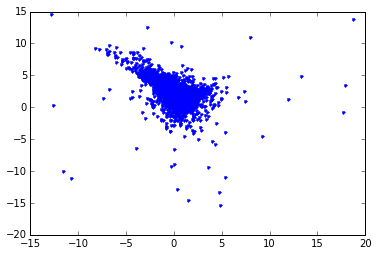

In [25]:
plt.plot(gminusr,iminusz,'.')

In [26]:
magspsf = getMagnitudes(table,27.0,{'r':'R_FLUX_PSF','i':'I_FLUX_PSF','g':'G_FLUX_PSF','z':'Z_FLUX_PSF'})

/Users/nmcstaff/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: RuntimeWarning: invalid value encountered in greater


In [27]:
gminusr = magspsf['g'] - magspsf['r']